In [1]:
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.io import imread, imshow
import numpy as np

images = imread('../DeepCell/20221220_S17_7722_E4_Scan1.tif')
snr = []
ps = []
for i in range(len(images)):
    image = images[i,:,:]
    thresh = threshold_otsu(image)
    binary = image > thresh

    # find the signal-to-noise ratio
    snr.append(np.mean(image[image > thresh]) / np.mean(image[image <= thresh]))
    # find the signal intensity
    ps.append(np.mean(image[image>thresh]))

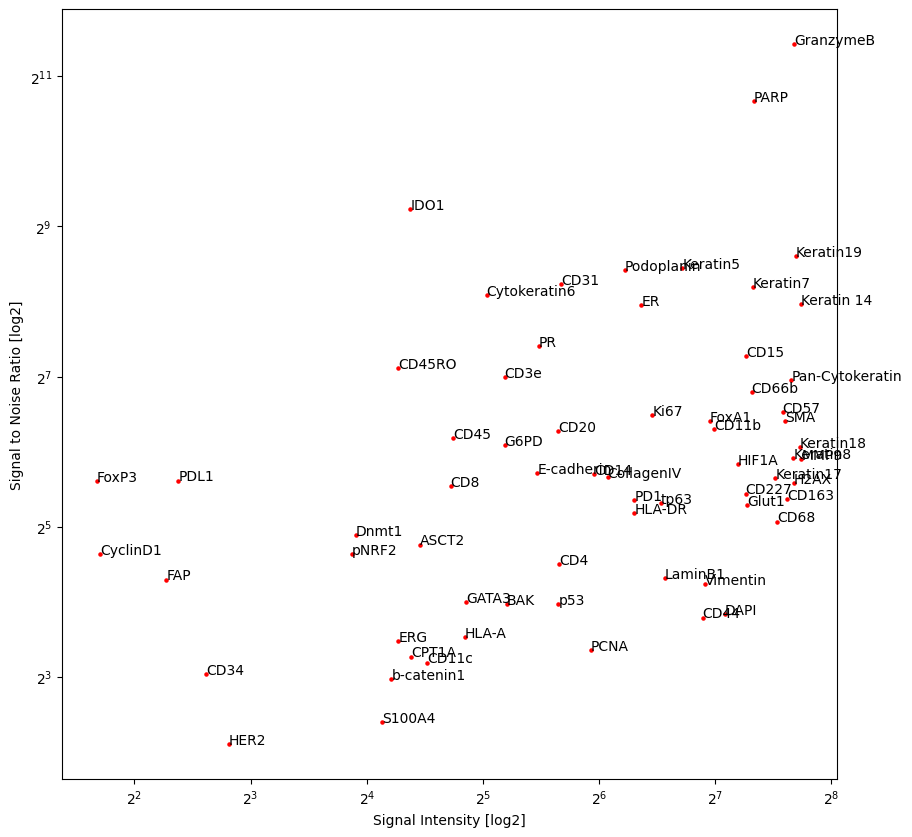

In [24]:
gene_names = ['DAPI','CD8','HLA-A','CD4','pNRF2','CD20','ER','Keratin 14','Vimentin','PR','E-cadherin','CD31','PDL1','CD45RO','Keratin19','CD3e','IDO1','SMA','CD11c','GranzymeB','Keratin5','CollagenIV','Podoplanin','CD14','FoxP3','ASCT2','CD45','tp63','CD44','HLA-DR','PD1','ERG','b-catenin1','HER2','CD57','Keratin8','CD163','GATA3','S100A4','CD68','HIF1A','Keratin18','FoxA1','LaminB1','CD227','H2AX','PCNA','Keratin17','CPT1A','CyclinD1','CD34','BAK','PARP','Keratin7','Dnmt1','FAP','Glut1','p53','G6PD','CD15','MMP9','Cytokeratin6','CD11b','Ki67','Pan-Cytokeratin','CD66b']
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax = plt.gca()
ax.scatter(ps ,snr , c='red', s=5)
for j, txt in enumerate(gene_names):
    ax.annotate(txt, (ps[j], snr[j]))
plt.xlabel("Signal Intensity [log2]")
plt.ylabel("Signal to Noise Ratio [log2]")
ax.set_xscale('log', base=2)
ax.set_yscale('log', base=2)
plt.show()

/tmp/ipykernel_1626288/2612822810.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])


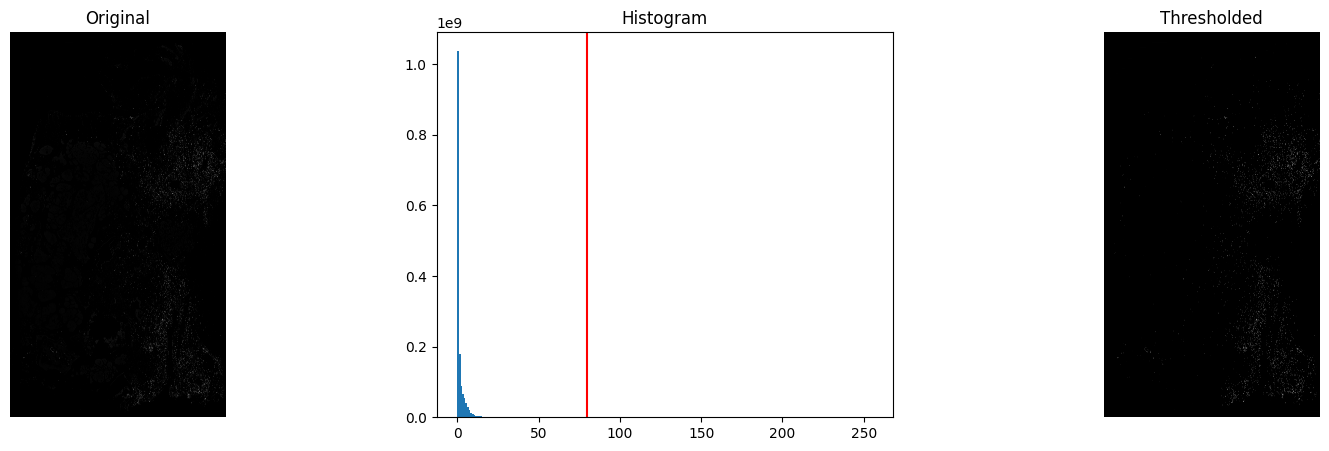

In [25]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()